In [1]:
from time_series_generator import TimeSeriesGenerator
from time_series_ddpm_model import TimeSeriesDDPM
import numpy as np
from statsmodels.tsa import ar_model
import matplotlib.pyplot as plt
import torch
import network_architectures
import utils

In [2]:
#data=TimeSeriesGenerator.generate_ar_series(300, 100, 1, 0.6,0.1)
data=TimeSeriesGenerator.generate_arma_11_series(300, 100, phi=0.6, theta=0.8, sigma=0.1)

In [3]:
series=data.numpy()

In [4]:
series.shape

(300, 100, 1)

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
tsmodel=ARIMA(series[0], order=(1, 0, 1), trend="n")

In [7]:
result=tsmodel.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  88.653
Date:                Tue, 01 Apr 2025   AIC                           -171.305
Time:                        12:58:12   BIC                           -163.490
Sample:                             0   HQIC                          -168.142
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5924      0.093      6.339      0.000       0.409       0.776
ma.L1          0.8871      0.050     17.797      0.000       0.789       0.985
sigma2         0.0097      0.001      7.649      0.000       0.007       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.44
Prob(Q):                              0.89   Prob(JB):                         0.18
Heteroskedasticity (H):               1.01   Skew:                             0.45
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
result.params[1]

np.float64(0.7728272930897564)

In [9]:
params = utils.ARMA_11_phi_theta_parameters_estimation(series)

C:\Users\ymateos\AppData\Local\anaconda3\envs\diffusion\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ymateos\AppData\Local\anaconda3\envs\diffusion\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ymateos\AppData\Local\anaconda3\envs\diffusion\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ymateos\AppData\Local\anaconda3\envs\diffusion\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

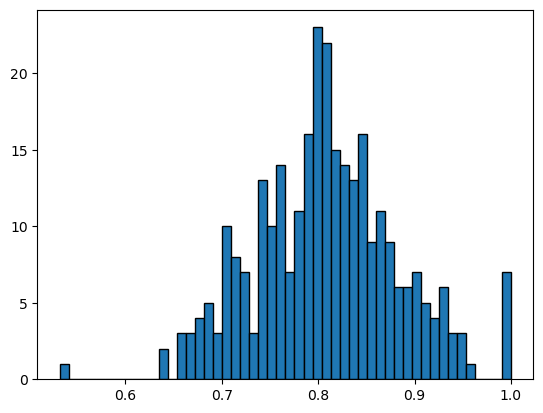

In [11]:
plt.hist(params[1], bins=50, edgecolor='black')
plt.show()

In [12]:
import scipy.stats as st
st.kurtosis(series[0])

array([-0.2241528], dtype=float32)

In [12]:
#from network_architectures import FCNNNet
#custom_net = FCNNNet(input_dim=1, hidden_dims=[64,128,64])
## Create the DDPM model using the custom network.
#ddpm_model = TimeSeriesDDPM(net=custom_net, T=1000)

In [13]:
from transformer_architecture import TransformerNet

In [15]:
custom_transformer = TransformerNet(
    input_dim=1,
    embed_dim=16,
    num_layers=2,
    nhead=4,
    dim_feedforward=64,
    dropout=0.1,
    use_positional_encoding=True
)

# Instantiate the DDPM model with the transformer network.
ddpm_model = TimeSeriesDDPM(net=custom_transformer, T=1000)


In [16]:
ddpm_model.train_model(data, num_epochs=40, plot=False)

Epoch 1, Loss: 1.0254026194413504
Epoch 2, Loss: 1.0067454198996226
Epoch 3, Loss: 1.0111372311909994
Epoch 4, Loss: 1.004495491584142
Epoch 5, Loss: 1.0010106941064199
Epoch 6, Loss: 0.9939361194769541
Epoch 7, Loss: 1.003682400782903
Epoch 8, Loss: 1.0027178049087524
Epoch 9, Loss: 0.9884401579697927
Epoch 10, Loss: 0.9875036398569743
Epoch 11, Loss: 0.9946710228919983
Epoch 12, Loss: 0.9994097729523976
Epoch 13, Loss: 0.9852431952953339
Epoch 14, Loss: 1.0088736911614735
Epoch 15, Loss: 0.9957156221071879
Epoch 16, Loss: 0.9915630638599395
Epoch 17, Loss: 0.9945111552874247
Epoch 18, Loss: 0.993131027619044
Epoch 19, Loss: 0.9961026986440022
Epoch 20, Loss: 1.0135318756103515
Epoch 21, Loss: 1.0015040814876557
Epoch 22, Loss: 0.9953844487667084
Epoch 23, Loss: 1.0027511795361836
Epoch 24, Loss: 1.0014430503050487
Epoch 25, Loss: 1.0057596564292908
Epoch 26, Loss: 1.0051508267720541
Epoch 27, Loss: 0.993493378162384
Epoch 28, Loss: 0.993609094619751
Epoch 29, Loss: 0.9844995518525441

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generated_series=ddpm_model.sample(seq_length=100, device=device, num_samples=300)

In [18]:
simulated_params=phi_parameter_estimation(generated_series)

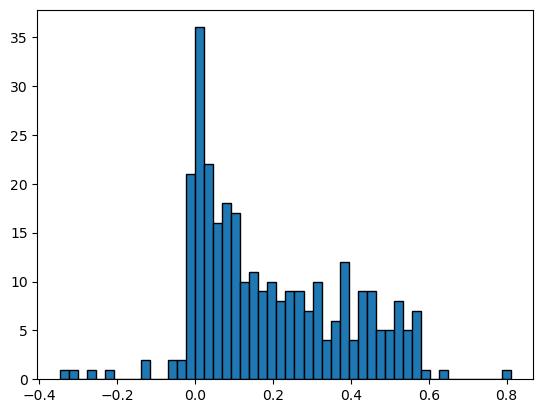

In [19]:
plt.hist(simulated_params, bins=50, edgecolor='black')
plt.show()